# Observations and Insights

* There is a postitive correlation between the weight of the mice and the tumor size.
* Capomulin and Ramicane were much more effective than Infubinol and Ceftamin in terms of final tumor volume.
* The treatment for subject u364 shows promise

## Merged Data

In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib inline

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [216]:
tot_m = len(merged_df["Mouse ID"].unique())
print(f"The number of mice in the study is {tot_m}")

The number of mice in the study is 249


In [223]:
dupes = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
numdupes = len(dupes)
print(f"The total number of duplicate mice in the study is {numdupes}.")

for i in range(0, len(dupes)):    
    print(f"Mouse ID {dupes[i]} has duplicate entries.")   

The total number of duplicate mice in the study is 1.
Mouse ID g989 has duplicate entries.


## Duplicate Mouse ID Data

In [199]:
g989 = merged_df[merged_df["Mouse ID"] == "g989"] 
g989.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


## Cleaned Data

In [200]:
clean_df=merged_df[merged_df["Mouse ID"].isin(dupes) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [222]:
tot_cl = len(clean_df["Mouse ID"].unique())
print(f"The total number of mice in the cleaned dataframe is {tot_cl}.")

The total number of mice in the cleaned dataframe is 248.


## Summary Statistics

In [202]:
mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdv = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

sumstats = round((pd.DataFrame({"Mean Tumor Vol": mean,
                                "Median Tumor Vol": median,
                                "Variance of Tumor Vol": var,
                                "Std Dev of Tumor Vol": stdv,
                                "SEM of Tumor Vol": sem})), 2)
sumstats

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Std Dev of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Summary Statistics (agg method)

In [203]:
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

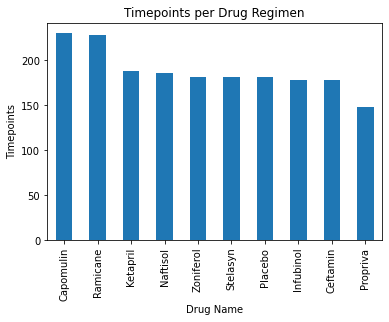

<Figure size 432x288 with 0 Axes>

In [205]:
tp_drugs = clean_df["Drug Regimen"].value_counts()
tp_drugs.plot(kind = "bar")
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Timepoints")
plt.xlabel("Drug Name")
plt.show()
plt.tight_layout()

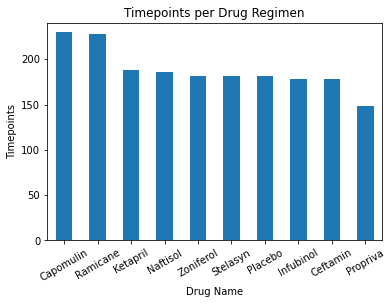

In [206]:
x = clean_df["Drug Regimen"].value_counts().index
y = clean_df["Drug Regimen"].value_counts()
plt.bar(x,y, width = .5)
plt.xticks(x, rotation = 30)
plt.xlim(-0.5, len(x)-0.5)
plt.ylim(0, max(y)+10)
plt.ylabel("Timepoints")
plt.xlabel("Drug Name")
plt.title("Timepoints per Drug Regimen")
plt.show()

<AxesSubplot:ylabel='Sex'>

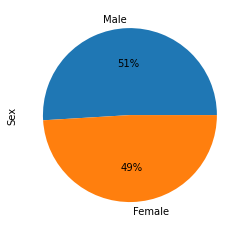

In [207]:
sex = clean_df["Sex"].value_counts()

sex.plot(kind="pie", autopct="%1.0f%%")

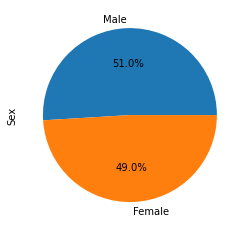

In [208]:
plt.pie(sex, labels=("Male", "Female"), autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [224]:
maxtp = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max()).rename(columns={"Timepoint": "Max Timepoint"})

max_df = pd.merge(clean_df, maxtp, on="Mouse ID")

In [225]:
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugvol = []

print("-----------------------------------------------")

for dname in drug:
    
    print(dname)
    
    drug_df = max_df.loc[max_df["Drug Regimen"] == dname]

    finalval_df = drug_df.loc[drug_df["Timepoint"] == drug_df["Max Timepoint"]]
    
    finalval = finalval_df["Tumor Volume (mm3)"]
    drugvol.append(finalval)
    
    quartiles = finalval.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {dname}: {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {dname}: {lower_bound}")
    print(f"Upper Bound for {dname}: {upper_bound}")
    
    outliers_count = (finalval.loc[(finalval_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                   (finalval_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"Number of {dname} outliers: {outliers_count}")
    print("-----------------------------------------------")

-----------------------------------------------
Capomulin
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
-----------------------------------------------
Ramicane
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
-----------------------------------------------
Infubinol
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
-----------------------------------------------
Ceftamin
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
-----------------------------------------------


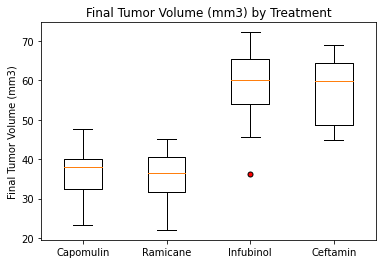

In [226]:
outliers = dict(marker="o", markerfacecolor="r", markersize=5)

plt.boxplot(drugvol, flierprops=outliers)

plt.title("Final Tumor Volume (mm3) by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], drug)

plt.show()

## Line and Scatter Plots

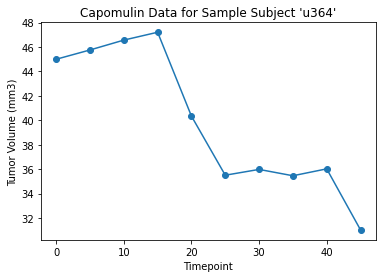

In [227]:
amouse = clean_df.loc[clean_df["Mouse ID"] == "u364"]

plt.plot(amouse["Timepoint"], amouse["Tumor Volume (mm3)"], marker = "o")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Data for Sample Subject 'u364'")

plt.show()

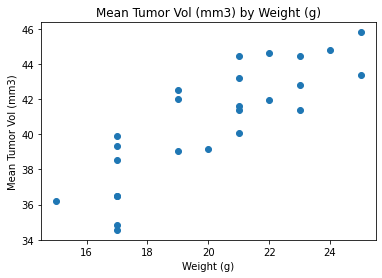

In [228]:
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

capavg_df = pd.DataFrame(cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Mean Tumor Vol (mm3)"})

capavg_df = pd.merge(cap_df, capavg_df, on="Mouse ID")

capfinal_df = capavg_df[["Weight (g)", "Mean Tumor Vol (mm3)"]].drop_duplicates()

x = capfinal_df["Weight (g)"]
y = capfinal_df["Mean Tumor Vol (mm3)"]

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Vol (mm3)")
plt.title("Mean Tumor Vol (mm3) by Weight (g)")
plt.show()

## Correlation and Regression


The correlation of weight and tumor volume is 0.84



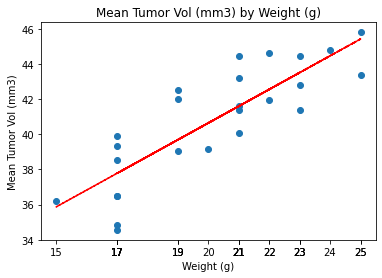

In [229]:
ccor = np.corrcoef(x, y)[0,1]
print(f"\nThe correlation of weight and tumor volume is {round(ccor,2)}\n")

c_slope, c_int, c_r, c_p, c_sem = st.linregress(x, y)
c_fit = c_slope * x + c_int

plt.scatter(x,y)
plt.plot(x,c_fit,"--", color="r")
plt.xticks(x)
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Vol (mm3)")
plt.title("Mean Tumor Vol (mm3) by Weight (g)")
plt.show()